### Simple Linear Regression on powerproduction dataset
#### GMIT Fun Data Analysis Project - Brendan Ryan

In [39]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [9]:
#have a look at dataset to make sure everything is ok
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [7]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [10]:
#lets have a look at a simple plot

In [18]:
s = df["speed"]
p = df["power"]

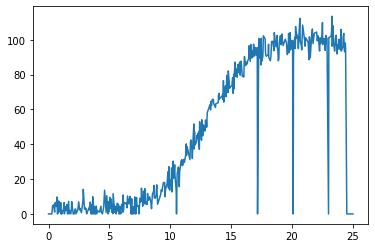

In [20]:
plt.plot(x,y);

## Research on Regression and Simple Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

- How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).
- The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).


https://www.scribbr.com/statistics/simple-linear-regression/

## Draw line to best fit 

- https://en.wikipedia.org/wiki/Curve_fitting
- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
- https://en.wikipedia.org/wiki/Simple_linear_regression

Calculate the mean values of our "p" power and "s" speed data

Numpy has a function named polyfit which can be used to fit lines to many dimensions

In [36]:
#calculate relationship using nump
coeffs = np.polyfit(s,p,1)
coeffs

array([  4.91759567, -13.89990263])

<function matplotlib.pyplot.show(*args, **kw)>

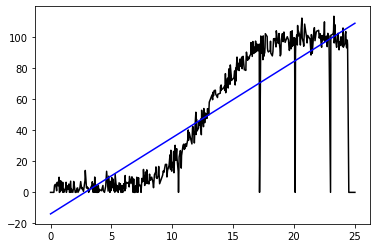

In [37]:
plt.plot(s,p, 'k', label = "Source Data");
plt.plot(s, coeffs[0] * s + coeffs[1], "b-", label = "best fit line");# remember y = mx + c equation for straight line 
plt.show